In [20]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import math

In [21]:
# Defining some variables

N = 5
L =  np.array([[2*np.pi*np.random.uniform() for x in range(N)] for y in range(N)]) # ask
N_md = 4
p_0 = np.random.normal(size=(N,N))
J=1
beta=1

print(np.ndim(L))

2


In [22]:
# Defining the Hamiltonian XY model

def Hamiltonian2D(J, L):
    Hamiltonian2D = 0.
    n = np.shape(L)[0]
    for x in range (np.shape(L)[0]):
        for y in range (np.shape(L)[0]):
            Hamiltonian2D -= J * ((np.cos(L[x, y] - L[x, (y+1)%n])) + (np.cos(L[x, y] - L[x, (y-1)%n])) 
                                  + (np.cos(L[x, y] - L[(x+1)%n, y])) + (np.cos(L[x, y] - L[(x-1)%n, y])))
    
    
    return np.array(Hamiltonian2D)/2
Hamiltonian2D(1,L)

-0.735115672079709

In [23]:
# Defining the artifical Hamiltonian XY model

def Hamiltonian2D_art(J, L, P, beta):
    n = np.shape(L)[0]
    Hamiltonian2D_art = sum(sum(P**2))/2 + beta*Hamiltonian2D(J, L)
    return Hamiltonian2D_art

# print(Hamiltonian2D_art(1, L, 1, 1 ))

In [24]:
# Defining the equations of motion

def P_dot_i_2D(J, L):
    n = np.shape(L)[0]
    P_dot_i_2D = np.zeros((n,n))

    for x in range (np.shape(L)[0]):
        for y in range (np.shape(L)[0]):
            P_dot_i_2D[x,y] -= J * ((np.sin(L[x, y] - L[x, (y+1)%n])) + (np.sin(L[x, y] - L[x, (y-1)%n])) 
                                    + (np.sin(L[x, y] - L[(x+1)%n, y])) + (np.sin(L[x, y] - L[(x-1)%n, y])))
    return P_dot_i_2D*beta
# print(P_dot_i_2D(1, L, 1, 1))

def phi_dot(P):   # confirm
    return P
            
print(P_dot_i_2D(1, L))


[[ 0.76682179 -3.35576371 -0.04536684 -0.36190724  3.31552386]
 [ 1.13212417 -0.82784098  2.87332834  1.23534977 -2.28508627]
 [ 0.07334756 -0.16029677  0.13333975  0.55635059  1.17138395]
 [-0.65402193 -2.14262811 -0.34150934  0.32517532  0.78509187]
 [-2.10287399  2.71315921 -0.84731624 -2.17363315  0.21724837]]


In [25]:
# Leapfrog integrator

def leapfrog_2D(N_md, p_0,J, L): 
    epsilon = 1/N_md
    p = p_0
    L_new = L
    L_new += phi_dot(p)*epsilon/2
    L_new = abs(L_new%(2*np.pi))
    for i in range(N_md-1):
        p += P_dot_i_2D(J, L)*epsilon
        L_new += phi_dot(p)*epsilon
        L_new = abs(L_new%(2*np.pi))
    
    p +=  P_dot_i_2D(J, L)*epsilon/2
    L_new -= phi_dot(p)*epsilon/2
    L_new = abs(L_new%(2*np.pi))
    return p, L_new

print(leapfrog_2D(N_md,p_0, J, L))

(array([[ 1.78601828e+00, -2.19093598e+00, -1.69793788e-01,
        -4.68249458e-03,  3.44296979e+00],
       [ 2.39027164e+00, -1.11101547e+00,  3.00564386e+00,
         2.62066907e+00, -4.74575797e+00],
       [-7.69543492e-02,  1.85181963e-01, -1.10871380e+00,
        -6.66247437e-01,  1.55486308e+00],
       [-1.01801491e+00, -3.36477313e+00, -2.07463313e-02,
         4.77447134e-01,  9.97581088e-01],
       [-1.10247577e+00,  2.26871197e+00, -6.07654486e-01,
        -3.61644597e+00,  1.00096022e+00]]), array([[3.9297004 , 3.99940555, 2.23395982, 1.70169034, 2.0169658 ],
       [0.38325003, 1.53912395, 1.65728361, 2.15598099, 5.13974652],
       [6.10934498, 2.01838845, 1.2434094 , 3.71136967, 5.22675156],
       [1.53685994, 3.23346248, 3.2100255 , 0.76661399, 1.37622636],
       [2.91860074, 2.78046659, 3.10195335, 2.09818463, 2.20468686]]))


In [26]:
# To see the convergence of leapfrog integrator

diff = []
range_1 =[10*i for i in range(10,100,5)]
p_0 = np.random.normal(size=(N,N))
for N_md in range_1:
   
    arr = leapfrog_2D(N_md, p_0, J,L)
    p_f = arr[0]          # We need final values of p_f and phi_f to calculate H_f
    Lat_ev = arr[1]
    H_f = Hamiltonian2D_art(J, Lat_ev, p_f, beta)
    H_0 = Hamiltonian2D_art(J, L, p_0, beta)
# dimension of L is 2 and p_0 
# The following is the quantity we want on y-axis
    diff.append(abs((H_f-H_0)/H_0)) 
    
# print(p_0)
# print(L)
# print(phi_f)

print("ini=",H_0)
print("final=",H_f)

ini= 10662.036426656732
final= 10671.118479150738


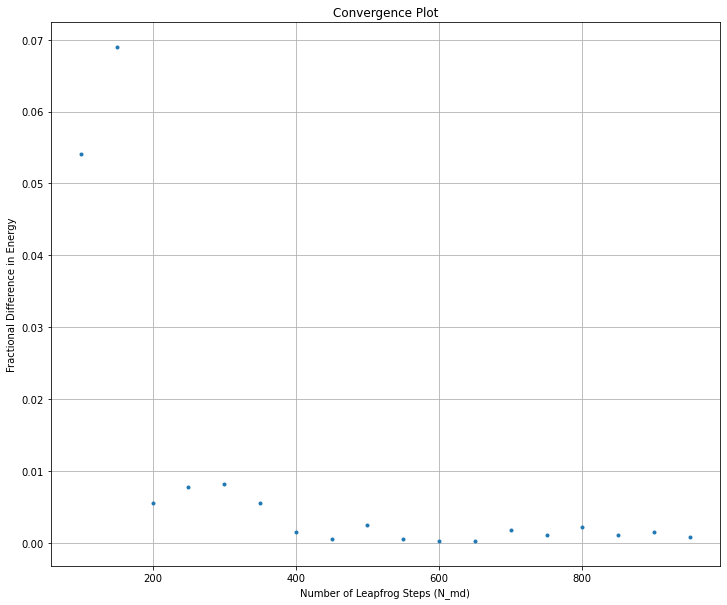

In [27]:

plt.figure(figsize=(12,10))
plt.xlabel('Number of Leapfrog Steps (N_md)')
plt.ylabel('Fractional Difference in Energy')
plt.title('Convergence Plot')
plt.grid()
plt.plot(range_1, diff,'.')
plt.show()


In [28]:
# Now we code the HMC algorithm

# Hamiltonian2D_art(J, L, P, beta)

# For me L_i == random sample

def markov_chain(L_i,N_cfg,N_md,beta_new,J):
    chain = []
    chain.append(L_i)
    for i in range(N_cfg):
        # Random sample
        p_hmc = np.random.normal(size=(N,N))
        new = leapfrog_2D(J,chain[-1], p_hmc, beta) # Integrating leapfrog algorithm
        prob = np.exp(Hamiltonian2D_art(J,chain[-1],p_hmc,beta)-Hamiltonian2D_art(J,new[1],new[0],beta))
#  Given probability distribution function defined above
        if prob > np.random.uniform(0,1):   # Accept/reject
            chain.append(new[1])  
        else:                           
            chain.append(chain[-1]) 
    return chain



In [29]:
# def variables(L_i, N_cfg, N_md, J, beta_new, obs):
#     chain = markov_chain(L_i,N_cfg,N_md,beta,J)
#     m = 0.0
#     E = 0.0
#     for i in range(np.shape(chain)[0]):
#         m += np.sum(L_i)
#         E += Hamiltonian2D(J,L_i)  
#     m = m/N*N
#     E = E/N*N
#     if obs == "m":
#         var = m
#     if obs == "E":
#         var = E
        
#     return var
        
#     # return m,E

In [35]:
def variables(L_i, N_cfg, N_md, J, beta_new, obs):
    chain = markov_chain(L_i,N_cfg,N_md,beta_new,J)
    m = 0.0
    E = 0.0
    for i in chain:
        m += np.sum(i)
        E += Hamiltonian2D(J,i)  
    m = m/N*N
    E = E/N*N
    if obs == "m":
        var = m
    if obs == "E":
        var = E
        
    return var
        
    # return m,E

In [39]:
N_cfg = 4000
beta_new = np.arange(1,4,1) 
# beta = 1 / kb * T
# L_i =  np.array([[2*np.pi*np.random.uniform() for x in range(N)] for y in range(N)]) #not sure, should be the random 
# sample but will we define it like this? if we do this then it will be the same as L but shouldnt be same right?

mag_5 = [variables(L_i, N_cfg, N_md, J, 1/beta, "m") for beta in beta_new]

plt.figure(figsize = (12,10))
plt.plot(beta_new, mag_5, 'o-',label="Computational")
plt.grid()
plt.xlabel("Temperature", fontsize = 13)
plt.ylabel("mag", fontsize = 13)
plt.legend()
plt.title("m as a f(T) for N = 5", fontsize = 20 )


IndexError: tuple index out of range